# Logistic regression
Mathematics and Methods in Machine Learning and Neural Networks<br>
Jori Nordlund, Simo Ojala ja Esa Ryömä<br>
Helsinki Metropolia University of Applied sciences<br>
06.03.2020

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

# Data

In [2]:
filename = r'https://raw.githubusercontent.com/esaryoma/machine-learning-datasets/master/vertebral_column_data/column_2C_colnames.dat'
df = pd.read_csv(filename,
                index_col = None,
                sep = ' ',
                na_values='?')

# Shuffling the samples and resetting indices since the samples were ordered from normal to abnormal
df = shuffle(df)
df.reset_index(inplace=True, drop=True)

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
0,83.88,23.08,87.14,60.80,124.65,80.56,AB
1,50.82,15.40,42.53,35.42,112.19,10.87,AB
2,50.75,20.24,37.00,30.52,122.34,2.29,NO
3,58.78,7.67,53.34,51.12,98.50,51.58,AB
4,48.80,18.02,52.00,30.78,139.15,10.44,NO


In [3]:
# Replacing class-attribute values "AB"(abnormal) to 1 and "NO"(normal) to 0
df['class'].replace(['AB', 'NO'],[1, 0], inplace=True)
df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
305,76.31,41.93,93.28,34.38,132.27,101.22,1
306,60.04,14.31,58.04,45.73,105.13,30.41,1
307,50.07,9.12,32.17,40.95,99.71,26.77,1
308,76.33,42.40,57.20,33.93,124.27,50.13,1
309,55.51,20.10,44.00,35.42,122.65,34.55,1


In [4]:
#Mean, std, min and max
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742,0.677419
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883,0.468220
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000,0.000000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000,0.000000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000,1.000000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000,1.000000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000,1.000000


In [5]:
# Splitting dataset to data and labels
data = df.iloc[:,:6]
labels = df.iloc[:,6]

print(data.shape)

(310, 6)


# Plotting the attribute correlations

In [6]:
correlations = data.corr()
correlations

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis
pelvic_incidence,1.000000,0.629186,0.717286,0.814959,-0.247484,0.638733
pelvic_tilt,0.629186,1.000000,0.432760,0.062327,0.032660,0.397840
lumbar_lordosis_angle,0.717286,0.432760,1.000000,0.598389,-0.080368,0.533665
sacral_slope,0.814959,0.062327,0.598389,1.000000,-0.342147,0.523571
pelvic_radius,-0.247484,0.032660,-0.080368,-0.342147,1.000000,-0.026073
grade_of_spondylolisthesis,0.638733,0.397840,0.533665,0.523571,-0.026073,1.000000


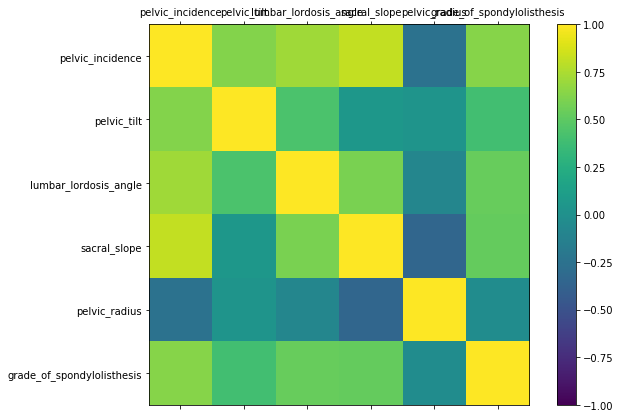

In [7]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns.values)
ax.set_yticklabels(data.columns.values)
plt.show()

A requirement for logistical regression analysis is that the features cannot be TOO correlated. The strongest correlation in this data are between <b>pelvic incidence</b> and <b>sacral slope</b> (correlation 0.81); also between <b>lumbar lordosis</b> angle and <b>pelvic incidence</b> (0.71). 

# Model
Building and fitting a logistic regression model.

In [8]:
reg = LogisticRegression()
reg.fit(data, labels) # Fitting the data to the model

print("Coefficients: ",reg.coef_)
print("Intercept: ", reg.intercept_)


Coefficients:  [[-0.03205038  0.10757546 -0.01869301 -0.06459006 -0.10677264  0.16808262]]
Intercept:  [15.15571757]


# Confusion matrix
- Positive in our case means having abnormalities
- True positive as tp (top left in the matrix)
- False negative as fn (top right in the matrix)
- True negative as tn (bottom right in the matrix)
- False positive as fp (bottom left in the matrix)



In [0]:
labels_pred = reg.predict(data)

In [24]:
tn, fp, fn, tp = confusion_matrix(labels, labels_pred).ravel()

print("Confusion matrix:\n", np.array([[tp, fn],[fp, tn]]))

Confusion matrix:
 [[188  22]
 [ 22  78]]


# Classification report
Precision and recall for abnormal samples is substantilly better compared to normal samples since the dataset is rather small and there are only 100 samples that are considered normal.<br>Support for normal is 100/310 and for abnormal it is 210/310.

In [16]:
print(classification_report(labels, labels_pred, target_names=['normal', 'abnormal']))

              precision    recall  f1-score   support

      normal       0.78      0.78      0.78       100
    abnormal       0.90      0.90      0.90       210

    accuracy                           0.86       310
   macro avg       0.84      0.84      0.84       310
weighted avg       0.86      0.86      0.86       310



# Cross validation
The dataset is so small that model validation is done using cross validation with 10 folds. This resulted in an accuracy of 84%

In [11]:
k = 10 # Amount of folds
scores = cross_val_score(estimator=reg,
                        X=data,
                        y=labels, # Actual values
                        scoring="accuracy", # Scoring is based on the accuracy of predictions
                        cv=k)
print("Accuracies from %d individual folds:" % k)
print(scores)
print("\nAccuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))

Accuracies from 10 individual folds:
[0.83870968 0.80645161 0.80645161 0.90322581 0.80645161 0.83870968
 0.90322581 0.77419355 0.87096774 0.93548387]

Accuracy calculated using 10-fold cross validation = 0.848


# Prediction probabilities


In [12]:
arr = np.array(reg.predict_proba(data))
np.set_printoptions(suppress=True)
print(arr[:10])
# Predictions [0, 1]
# Every row is a patient
# Leftmost value is the propability for not having vertebral abnormalities
# Rightmost value is the propability for having vertebral abnormalities

[[0.000066   0.999934  ]
 [0.12466013 0.87533987]
 [0.40953154 0.59046846]
 [0.00035234 0.99964766]
 [0.63008472 0.36991528]
 [0.55414431 0.44585569]
 [0.02536596 0.97463404]
 [0.0000002  0.9999998 ]
 [0.0599724  0.9400276 ]
 [0.73051785 0.26948215]]


# Demo program for trying to predict whether patient has abnormalities or not

In [25]:
# These are the values the doctor or patient would give as an input
testPelvicIncidence = input("Give pelvic incidence:\n")
testPelvicTilt = input("Give pelvic tilt:\n")
testLumbarLondosisAngle = input("Give lumbar londosis angle:\n")
testSacralSlope = input("Give sacral lope:\n")
testPelvicRadius = input("Give pelvic radius:\n")
testGradeOfSpondylolisthesis = input("Give grade of spondylolisthesis:\n")

# Here the data is given to the model for predicting if the patient has abnormalities or not
testPerson = pd.DataFrame(np.array([testPelvicIncidence, testPelvicTilt, testLumbarLondosisAngle, testSacralSlope, testPelvicRadius, testGradeOfSpondylolisthesis]).reshape(1, 6))
pred = reg.predict_proba(testPerson)

# Printing the propabilities of the prediction and giving an output based on the prediction of the patients state
print("\nProbabilities:\n", pred, "\n")

if pred[0][0] > pred[0][1]:
  print("The patient is healthy with a probability of %.2f"% (pred[0][0]*100) + "%")
else:
  print("The patient has a vertebral abnormality with a probability of %.2f"% (pred[0][1]*100) + "%")

Give pelvic incidence:
10
Give pelvic tilt:
-4
Give lumbar londosis angle:
25
Give sacral lope:
-0.5
Give pelvic radius:
12
Give grade of spondylolisthesis:
1

Probabilities:
 [[0.00000261 0.99999739]] 

The patient has a vertebral abnormality with a probability of 100.00%


## Results
The demo program works as expected, though for the lack of a large data set more model testing is needed with data not used in training. Model accuracy could be thus improved from the present 85%, and especially classification to class "normal" has room for improvement. 